# Aggregating benchmark runs

In [27]:
import pathlib
import typing

import humanize
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from labm8 import pbutil
from labm8 import viz
from labm8 import labdate
from labm8 import labtypes
from labm8 import prof

from gpu.libcecl.proto import libcecl_pb2
from datasets.benchmarks.gpgpu import gpgpu_pb2

In [36]:
LOGDIR = pathlib.Path('/var/phd/shared/datasets/benchamrks/gpgpu/logs')
assert LOGDIR.is_dir()
!echo $(ls {LOGDIR} | wc -l) files

161 files


In [37]:
def KernelInvocationToRow(log: gpgpu_pb2.GpgpuBenchmarkRun, ki: libcecl_pb2.OpenClKernelInvocation):
    return {
        'date': labdate.DatetimeFromMillisecondsTimestamp(log.run.ms_since_unix_epoch),
        'suite': log.benchmark_suite,
        'benchmark': log.benchmark_name,
        'dataset': log.dataset_name,
        'device': log.run.device.device_name,
        'kernel': ki.kernel_name,
        'global_size': ki.global_size,
        'local_size': ki.local_size,
        'runtime_ms': ki.runtime_ms,
        'transferred_bytes': ki.transferred_bytes,
    }

def LogsToTable(logs: typing.Iterator[gpgpu_pb2.GpgpuBenchmarkRun]):
    rows = []
    for log in logs:
        rows += [KernelInvocationToRow(log, ki) for ki in log.run.kernel_invocation]
    return pd.DataFrame(rows, columns=[
        'date',
        'suite',
        'benchmark',
        'dataset',
        'device',
        'kernel',
        'global_size',
        'local_size',
        'runtime_ms',
        'transferred_bytes',
    ])

with prof.ProfileToStdout():
    df = LogsToTable(pbutil.FromFile(log, gpgpu_pb2.GpgpuBenchmarkRun())
                     for log in LOGDIR.iterdir())
df

completed in 8.738 seconds (started 8 seconds ago)


,date,suite,benchmark,dataset,device,kernel,global_size,local_size,runtime_ms,transferred_bytes
0,2019-03-01 13:33:45.611,rodinia-3.1,heartwall,default,GeForce GTX 1080,kernel_gpu_opencl,13056,256,4.887680,43957004
1,2019-03-01 13:33:45.611,rodinia-3.1,heartwall,default,GeForce GTX 1080,kernel_gpu_opencl,13056,256,14.958240,43957004
2,2019-03-01 13:33:45.611,rodinia-3.1,heartwall,default,GeForce GTX 1080,kernel_gpu_opencl,13056,256,14.984352,43957004
3,2019-03-01 13:33:45.611,rodinia-3.1,heartwall,default,GeForce GTX 1080,kernel_gpu_opencl,13056,256,14.960288,43957004
4,2019-03-01 13:33:45.611,rodinia-3.1,heartwall,default,GeForce GTX 1080,kernel_gpu_opencl,13056,256,14.976800,43957004
5,2019-03-01 13:33:45.611,rodinia-3.1,heartwall,default,GeForce GTX 1080,kernel_gpu_opencl,13056,256,14.975424,43957004
6,2019-03-01 13:33:45.611,rodinia-3.1,heartwall,default,GeForce GTX 1080,kernel_gpu_opencl,13056,256,14.994016,43957004
7,2019-03-01 13:33:45.611,rodinia-3.1,heartwall,default,GeForce GTX 1080,kernel_gpu_opencl,13056,256,14.978176,43957004
8,2019-03-01 13:33:45.611,rodinia-3.1,heartwall,default,GeForce GTX 1080,kernel_gpu_opencl,13056,256,15.001440,43957004
9,2019-03-01 13:33:45.611,rodinia-3.1,heartwall,default,GeForce GTX 1080,kernel_gpu_opencl,13056,256,14.976576,43957004


## How many unique kernel invocations are there?

Where a unique kernel invocation is a unique combination of <suite,benchmark,kernel,dataset>.

In [39]:
summary = df.groupby(['suite', 'benchmark', 'kernel', 'dataset']).count()\
    .rename(columns={'date': 'invocation_count'})[['invocation_count']]
print(len(summary), 'unique kernel invocations across all devices,', humanize.intcomma(sum(summary['invocation_count'])), 'total')
summary

587 unique kernel invocations across all devices, 1,220,812 total


invocation_count
suite           benchmark            kernel                          dataset                  
amd-app-sdk-3.0 BinomialOption       binomial_options                default                 1
                BitonicSort          bitonicSort                     default               120
                BlackScholes         blackScholes                    default                 1
                FastWalshTransform   fastWalshTransform              default                10
                FloydWarshall        floydWarshallPass               default               256
                MatrixMultiplication mmmKernel                       default                 1
                MatrixTranspose      matrixTranspose                 default                 1
                MonteCarloAsian      calPriceVega_Scalar             default                10
                PrefixSum            group_prefixSum                 default                 1
                Reduction            reduce                          default                 1
                ScanLargeArrays      ScanLargeArrays                 default                 1
                                     blockAddition                   default                 1
                                     prefixSum                       default                 1
                SimpleConvolution    simpleNonSeparableConvolution   default                 1
                                     simpleSeparableConvolutionPass1 default                 1
                                     simpleSeparableConvolutionPass2 default                 1
                SobelFilter          sobel_filter                    default                 1
npb-3.3         bt.A                 add                             A                     402
                                     compute_rhs1                    A                     404
                                     compute_rhs2                    A                     404
                                     compute_rhs3                    A                     404
                                     compute_rhs4                    A                     404
                                     compute_rhs5                    A                     404
                                     compute_rhs6                    A                     404
                                     error_norm                      A                       2
                                     exact_rhs1                      A                       2
                                     exact_rhs2                      A                       2
                                     exact_rhs3                      A                       2
                                     exact_rhs4                      A                       2
                                     exact_rhs5                      A                       2
...                                                                                        ...
shoc-1.1.5      S3D                  ratt6_kernel                    default                20
                                     ratt7_kernel                    default                20
                                     ratt8_kernel                    default                20
                                     ratt9_kernel                    default                20
                                     ratt_kernel                     default                20
                                     ratx2_kernel                    default                20
                                     ratx4_kernel                    default                20
                                     ratx_kernel                     default                20
                                     ratxb_kernel                    default                20
                                     rdsmh_kernel                    default            

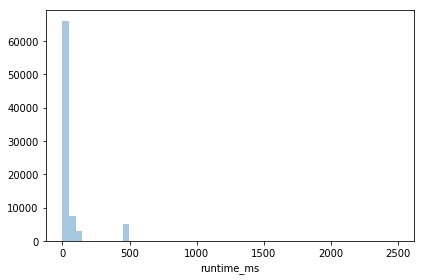

In [30]:
sns.distplot(df.runtime_ms, kde=False)
viz.Finalize()

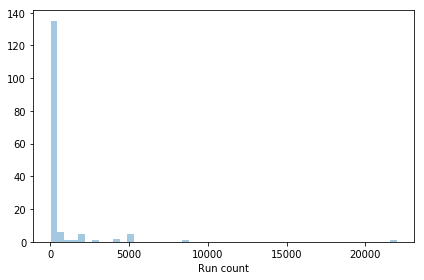

In [8]:
num_runs = df.groupby(['suite', 'benchmark', 'kernel', 'dataset']).count()['runtime_ms']
sns.distplot(num_runs, kde=False)
plt.xlabel('Run count')
viz.Finalize()

In [9]:
# Sanity check that features are the same across runs.
# TODO(cec): Do we care about global and local sizes being consistent?

def ColumnIsConstantAcrossRuns(df, col):
    """Check that column is consistent across all runs from all devices."""
    mins = df.groupby(['suite', 'benchmark', 'kernel', 'dataset', 'global_size', 'local_size']).min()[col]
    maxs = df.groupby(['suite', 'benchmark', 'kernel', 'dataset', 'global_size', 'local_size']).max()[col]
    mean = (mins == maxs).mean()
    if mean != 1:
        print(f'{mean:.1%} of {col} values are constant')
    return mean == 1

assert ColumnIsConstantAcrossRuns(df, 'transferred_bytes')

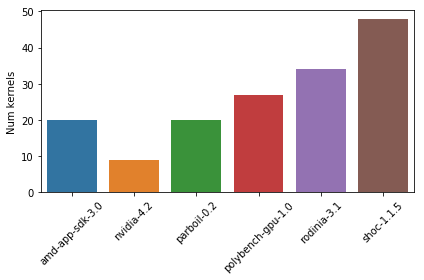

In [10]:
sns.barplot(x='suite', y='global_size', 
            data=df.groupby(['suite', 'benchmark', 'kernel', 'dataset']).mean().groupby(['suite']).count().reset_index())
plt.ylabel('Num kernels')
viz.RotateXLabels(45)
plt.xlabel('')
viz.Finalize()

In [9]:
# Aggregate
df.groupby(['suite', 'benchmark', 'kernel', 'dataset', 'device']).mean()

global_size  \
suite             benchmark            kernel                          dataset device                           
amd-app-sdk-3.0   BinomialOption       binomial_options                default GeForce GTX 1080  1.632000e+04   
                  BitonicSort          bitonicSort                     default GeForce GTX 1080  1.638400e+04   
                  BlackScholes         blackScholes                    default GeForce GTX 1080  6.553600e+04   
                  FastWalshTransform   fastWalshTransform              default GeForce GTX 1080  5.120000e+02   
                  FloydWarshall        floydWarshallPass               default GeForce GTX 1080  6.553600e+04   
                  MatrixMultiplication mmmKernel                       default GeForce GTX 1080  2.560000e+02   
                  MatrixTranspose      matrixTranspose                 default GeForce GTX 1080  2.560000e+02   
                  MonteCarloAsian      calPriceVega_Scalar             default GeForce GTX 1080  5.242880e+05   
                  PrefixSum            group_prefixSum                 default GeForce GTX 1080  1.024000e+03   
                  Reduction            reduce                          default GeForce GTX 1080  2.560000e+02   
                  ScanLargeArrays      ScanLargeArrays                 default GeForce GTX 1080  1.638400e+04   
                                       blockAddition                   default GeForce GTX 1080  3.276800e+04   
                                       prefixSum                       default GeForce GTX 1080  6.400000e+01   
                  SimpleConvolution    simpleNonSeparableConvolution   default GeForce GTX 1080  2.621440e+05   
                                       simpleSeparableConvolutionPass1 default GeForce GTX 1080  2.631680e+05   
                                       simpleSeparableConvolutionPass2 default GeForce GTX 1080  2.621440e+05   
                  SobelFilter          sobel_filter                    default GeForce GTX 1080  2.621440e+05   
nvidia-4.2        BlackScholes         BlackScholes                    default GeForce GTX 1080  6.144000e+04   
                  ConvolutionSeparable convolutionColumns              default GeForce GTX 1080  1.179648e+06   
                                       convolutionRows                 default GeForce GTX 1080  1.179648e+06   
                  DCT8x8               DCT8x8                          default GeForce GTX 1080  5.242880e+05   
                  DotProduct           DotProduct                      default GeForce GTX 1080  1.277952e+06   
                  Scan                 scanExclusiveLocal1             default GeForce GTX 1080  1.703936e+06   
                                       scanExclusiveLocal2             default GeForce GTX 1080  6.656000e+03   
                                       uniformUpdate                   default GeForce GTX 1080  1.703936e+06   
                  VectorAdd            VectorAdd                       default GeForce GTX 1080  1.144499e+07   
parboil-0.2       bfs.1M               BFS_kernel                      default GeForce GTX 1080  5.979310e+02   
                  bfs.NY               BFS_kernel                      default GeForce GTX 1080  5.176709e+02   
                  bfs.SF               BFS_kernel                      default GeForce GTX 1080  1.274388e+03   
                  bfs.UT               BFS_kernel                      default GeForce GTX 1080  3.707013e+02   
...                                                                                                       ...   
                  sad.default          larger_sad_calc_8               default GeForce GTX 1080  1.267200e+04   
                                       mb_sad_calc                     default GeForce GTX 1080  9.662400e+04   
                  sad.large            larger_sad_calc_16              default GeForce GTX 1080  2.572800e+05   
                              

In [13]:
# Averages (only the runtime_ms field is averaged, everything else is constant)
df.groupby(['suite', 'benchmark', 'kernel', 'dataset', 'device', 'global_size', 'local_size']).mean()

runtime_ms  \
suite           benchmark            kernel                          dataset device                                    global_size local_size               
amd-app-sdk-3.0 AdvancedConvolution  advancedNonSeparableConvolution default Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 262144      256           1.280952   
                                     advancedSeparableConvolution    default Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 262144      256           1.441916   
                BinomialOption       binomial_options                default GeForce GTX 1080                          16320       255           0.083712   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 16320       255           3.228094   
                BitonicSort          bitonicSort                     default GeForce GTX 1080                          16384       256           0.023050   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 16384       256           0.073515   
                BlackScholes         blackScholes                    default GeForce GTX 1080                          65536       256           0.303200   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 65536       256           1.258676   
                FastWalshTransform   fastWalshTransform              default GeForce GTX 1080                          512         256           0.034483   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 512         256           0.081878   
                FloydWarshall        floydWarshallPass               default GeForce GTX 1080                          65536       256           0.138076   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 65536       256           0.672785   
                Histogram            histogram256_scalar             default Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 8192        128           0.966193   
                MatrixMultiplication mmmKernel                       default GeForce GTX 1080                          256         64            0.059168   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 256         64            0.119103   
                MatrixTranspose      matrixTranspose                 default GeForce GTX 1080                          256         256           0.041792   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 256         256           0.088812   
                MonteCarloAsian      calPriceVega_Scalar             default GeForce GTX 1080                          524288      256           1.560032   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 524288      256          19.196229   
                PrefixSum            group_prefixSum                 default GeForce GTX 1080                          1024        1024          0.028672   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 4096        4096          0.293276   
                Reduction            reduce                          default GeForce GTX 1080                          256         256           0.044064   
                                                                             Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz 256         256           0.208933   
                ScanLargeArrays      ScanLargeArrays                 default GeForce GTX 1080                          16384       128           0.023104   
                                                             